# Ecommerce Sales Data Analytics Project

In [2]:
#  Import the Python Libraries Pandas, Seaborn, MatplotLib and MySQL Connector
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector


#  Build the SQL Connection
db = mysql.connector.connect(host = "127.0.0.1",
                             username = "root",
                             password = "1234!@#$Tushar",
                             database = "ecommerce")

cur = db.cursor();

# List all unique cities where customers are located.

In [3]:
#  SQL Query 
query = """select distinct(customer_city)
           from customers"""
cur.execute(query)

data = cur.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# Count the number of orders placed in 2017.

In [4]:
query = """select count(order_id)
from orders
where year(order_purchase_timestamp) = 2017 """
cur.execute(query)

data = cur.fetchall()

"Total Order Placed in the year 2017 are:- ", data[0][0]

('Total Order Placed in the year 2017 are:- ', 45101)

# Find the total sales per category.

In [5]:
query = """ select upper(products.product_category) category, round(sum(payments.payment_value), 2) sales
      from products join order_items
      on products.product_id = order_items.product_id
      join payments
      on payments.order_id = order_items.order_id
      group by category"""
cur.execute(query)
 
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Category", "Sales"])
df

,Category,Sales
0,PERFUMERY,506738.66
1,FURNITURE DECORATION,1430176.39
2,TELEPHONY,486882.05
3,FASHION BAGS AND ACCESSORIES,218158.28
4,BED TABLE BATH,1712553.67
...,...,...
69,CDS MUSIC DVDS,1199.43
70,LA CUISINE,2913.53
71,FASHION CHILDREN'S CLOTHING,785.67
72,PC GAMER,2174.43


# Calculate the percentage of orders that were paid in installments.

In [6]:
query = """ select (sum(case when payment_installments >= 1 then 1 
else 0 end))/count(*)*100 from payments
"""
cur.execute(query)
 
data = cur.fetchall()
"Percentage of the Installment People:- ",data[0][0]

('Percentage of the Installment People:- ', Decimal('99.9981'))

# Count the number of customers from each state

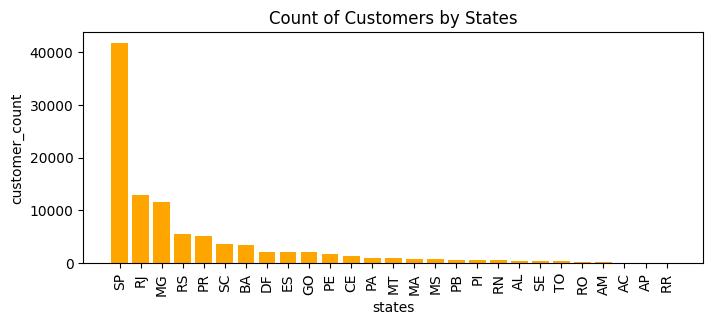

In [22]:
query = """select customer_state , count(customer_id) as Count
from customers
group by customer_state
"""
cur.execute(query)
 
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["States", "Count of People"])
df = df.sort_values(by = "Count of People", ascending = False)

plt.figure(figsize = (8,3))
plt.bar(df["States"], df["Count of People"], color = "orange")
plt.xticks(rotation = 90)
plt.xlabel("states")
plt.ylabel("customer_count")
plt.title("Count of Customers by States")
plt.show()

# Calculate the number of orders per month in 2018.

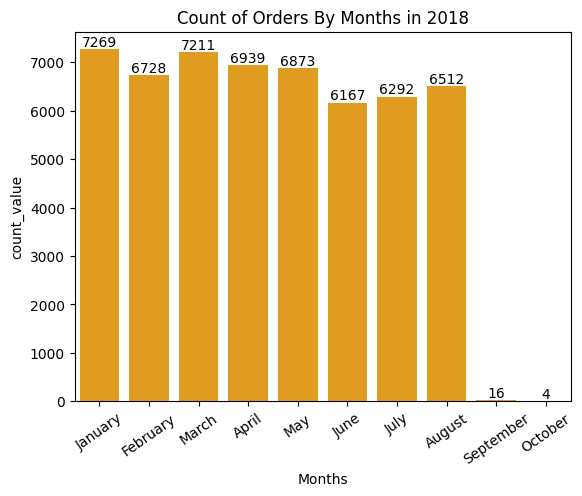

In [23]:
query = """select monthname(order_purchase_timestamp) months, count(order_id) order_count
from orders
where year(order_purchase_timestamp) = 2018
group by months"""
cur.execute(query)
 
data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Months", "count_value"])
o = ["January", "February", "March", "April", "May","June", "July","August", "September", "October"]
# df = df.sort_values(by = "count_Value", ascending = False)

ax = sns.barplot(x = df["Months"],y = df["count_value"], data = df, order = o, color = "orange")
plt.xticks(rotation = 35)
ax.bar_label(ax.containers[0])
plt.title("Count of Orders By Months in 2018")
plt.show()


In [9]:
# Find the average number of products per order, grouped by customer city.

query = """with count_per_order as 
(select orders.order_id, orders.customer_id, count(order_items.order_id) as oc
from orders join order_items
on orders.order_id = order_items.order_id
group by orders.order_id, orders.customer_id)

select customers.customer_city, round(avg(count_per_order.oc),2) average_orders
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city order by average_orders desc
"""
cur.execute(query)
 
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Customer_city", "Average Per Order"])
df.head(10)

,Customer_city,Average Per Order
0,padre carvalho,7.00
1,celso ramos,6.50
2,candido godoi,6.00
3,datas,6.00
4,matias olimpio,5.00
5,morro de sao paulo,4.00
6,cidelandia,4.00
7,picarra,4.00
8,teixeira soares,4.00
9,curralinho,4.00


# Calculate the percentage of total revenue contributed by each product category.

In [10]:
query = """select upper(products.product_category) category, round(sum(payments.payment_value) / (select sum(payment_value) from payments) * 100 , 2) sales
      from products join order_items
      on products.product_id = order_items.product_id
      join payments
      on payments.order_id = order_items.order_id
      group by category order by sales desc"""
cur.execute(query)
 
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Categories", "Sales(in %)"])
df.head(10) 

,Categories,Sales(in %)
0,BED TABLE BATH,10.70
1,HEALTH BEAUTY,10.35
2,COMPUTER ACCESSORIES,9.90
3,FURNITURE DECORATION,8.93
4,WATCHES PRESENT,8.93
5,SPORT LEISURE,8.70
6,HOUSEWARES,6.84
7,AUTOMOTIVE,5.32
8,GARDEN TOOLS,5.24
9,COOL STUFF,4.87


# Identify the correlation between product price and the number of times a product has been purchased.

In [11]:
#  We Need to Calculate the correlation between the Order Count and the Averaage Price.
# For Finding The relation between Them we just Simply Use the Function present into the nympy....


import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector
import numpy as np

query  = """select upper(p.product_category), count(o.product_id), round(avg(o.price), 2)
from products p join order_items o
on p.product_id = o.product_id
group by p.product_category
order by count(o.product_id) desc"""
cur.execute(query)
 
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Category", "Order_Count", "Average Price"])
df.head(10)

arr1 = df["Order_Count"];
arr2 = df["Average Price"]

#   There are no dependencies for both things means we cannot say that one is increasing on the behalf of the second Thing
a = np.corrcoef([arr1, arr2])
print("The Correlation between the price and the No. of Order Count",  a[0][1])


The Correlation between the price and the No. of Order Count -0.10631514167157564


# Calculate the total revenue generated by each seller, and rank them by revenue.

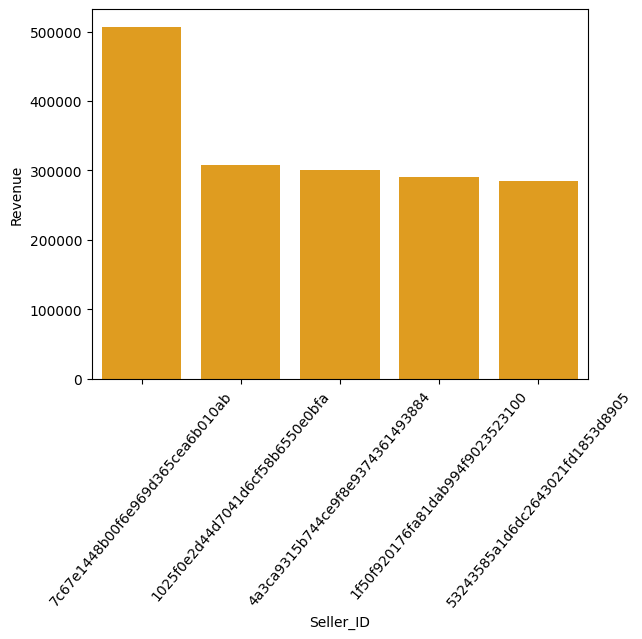

In [24]:
query  = """select *, dense_rank() over(order by Revenue desc) as Rank_Column from 
(select order_items.seller_id as Seller_ID, sum(payments.payment_value) as Revenue
from order_items join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a"""

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Seller_ID", "Revenue", "Rank By Revenue"])
# df.head(10)
sns.barplot(x = "Seller_ID", y = "Revenue", data = df.head(5), color = "orange")
plt.xticks(rotation  = 50)
plt.show() 

# Calculate the moving average of order values for each customer over their order history.

In [13]:
query = """select customer_id, order_purchase_timestamp, payment, 
avg(payment) over (partition by customer_id order by order_purchase_timestamp rows between 5 preceding and current row) as Moving_Avg
from
(select orders.customer_id, orders.order_purchase_timestamp, payments.payment_value as payment
from orders join payments
on orders.order_id = payments.order_id)  as a"""
cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Customer_ID", "Order_Purchase_Timestamp", "Payment", "Moving_Average"])
df.head(20)

,Customer_ID,Order_Purchase_Timestamp,Payment,Moving_Average
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002
5,0004164d20a9e969af783496f3408652,2017-04-12 08:35:12,71.80,71.800003
6,000419c5494106c306a97b5635748086,2018-03-02 17:47:40,49.40,49.400002
7,00046a560d407e99b969756e0b10f282,2017-12-18 11:08:30,166.59,166.589996
8,00050bf6e01e69d5c0fd612f1bcfb69c,2017-09-17 16:04:44,85.23,85.230003
9,000598caf2ef4117407665ac33275130,2018-08-11 12:14:35,1255.71,1255.709961


# Calculate the cumulative sales per month for each year.

In [14]:
query = """select Years, Months, Payment, sum(Payment) over(order by Years, Months) Cumulative_Sales from
(select year(orders.order_purchase_timestamp) as Years, month(orders.order_purchase_timestamp) as Months, 
round(sum(payments.payment_value), 2) Payment
from orders join payments
on orders.order_id = payments.order_id
group by Years, Months order by Years,Months) as a"""

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Year", "Month", "Price" , "Cumulative Price"])
df


,Year,Month,Price,Cumulative Price
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39
5,2017,3,449863.60,939621.99
6,2017,4,417788.03,1357410.02
7,2017,5,592918.82,1950328.84
8,2017,6,511276.38,2461605.22
9,2017,7,592382.92,3053988.14


# Calculate the year-over-year growth rate of total sales.

In [15]:
query = """
with a as(select year(orders.order_purchase_timestamp) as Years, round(sum(payments.payment_value),2) as payment
from orders join payments
on orders.order_id = payments.order_id
group by Years order by Years)

select Years, ((payment - lag(payment, 1) over(order by Years))/ lag(payment, 1) over(order by Years)) * 100 from a 
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Years", "YOY Growth (%)"])
df

,Years,YOY Growth (%)
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


# Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [16]:
 query = """with a as(select customers.customer_id , min(orders.order_purchase_timestamp) as First_Order
from customers join orders
on customers.customer_id = orders.customer_id
group by customers.customer_id),
 b as (select a.customer_id, count(distinct(orders.order_purchase_timestamp)) as Next_Order
from a join orders
on orders.customer_id = a.customer_id
and orders.order_purchase_timestamp > First_Order
and orders.order_purchase_timestamp < date_add(First_Order, interval 6 month)
group by a.customer_id)

select 100 * (count(distinct(a.customer_id)) / count(distinct(b.customer_id))) as Customer_Count
from a left join b
on a.customer_id = b.customer_id"""

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Repeated Customer"])
df

#  So here we dont have any person who purchase any Item in 6 months after the first Order

,Repeated Customer
0,None


# Identify the top 3 customers who spent the most money in each year.

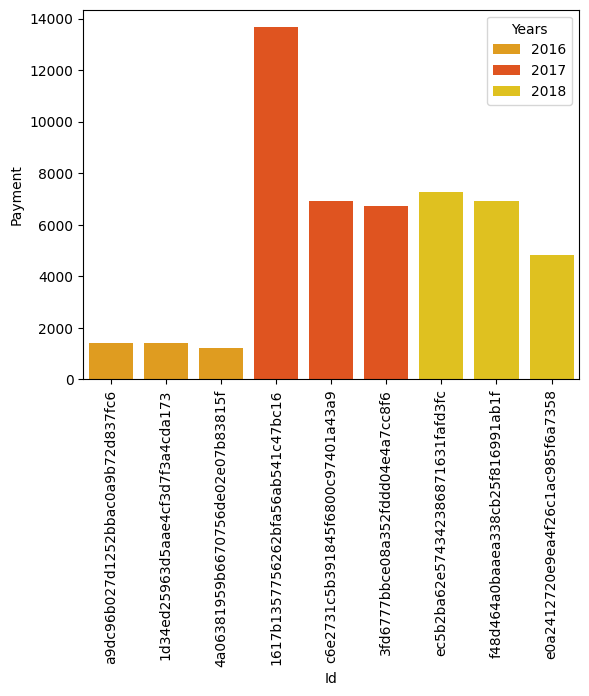

In [28]:
query = """select Years, customer_id, Payment, Dense_Ranks
from (select year(orders.order_purchase_timestamp) as Years, orders.customer_id, sum(payments.payment_value) as Payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp) order by sum(payments.payment_value) desc) as Dense_Ranks
from orders join payments
on orders.order_id = payments.order_id
group by year(orders.order_purchase_timestamp), orders.customer_id) as a
where Dense_Ranks <= 3;"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Years", "Id", "Payment", "Rank"])
palette = sns.color_palette(["#FFA500", "#FF4500", "#FFD700"]) 
sns.barplot(x = "Id", y = "Payment", data = df, hue = "Years", palette = palette)
plt.xticks(rotation = 90)
plt.show()